In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [2]:
u = 1.66053906660e-27
m = 4.00260325413 * u
k_B = 1.380649e-23

In [3]:
T = 100.0e-6
sigma_0 = 1.0e-3

In [4]:
sigma_v = np.sqrt(k_B * T / m)

### Test with 1 data per time value

In [55]:
N = 20
t = np.linspace(2.0e-3, 15.0e-3, N)
sigma = np.random.normal(1.0, 0.05, N) * np.sqrt(sigma_0**2 + sigma_v**2 * t**2)

Text(0, 0.5, '$\\sigma$ ($mm$)')

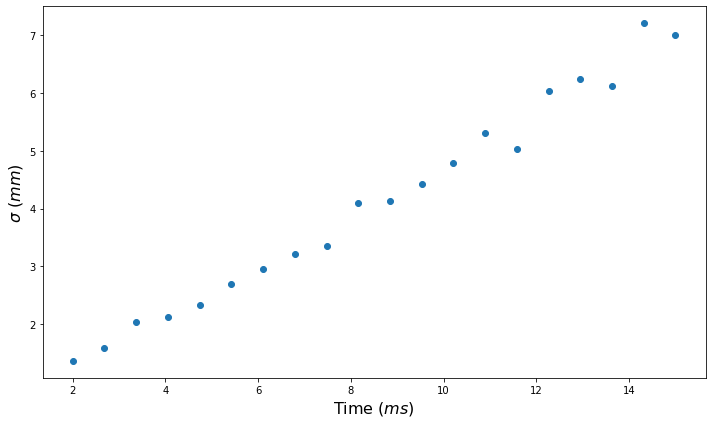

In [56]:
fig, ax = plt.subplots(figsize=(10.0,6.0), tight_layout=True)

ax.plot(t*1e3, sigma*1e3, marker="o", linestyle="")

ax.set_xlabel("Time ($ms$)", fontsize=16)
ax.set_ylabel("$\sigma$ ($mm$)", fontsize=16)

In [57]:
def linfunc(x, a, b):
    return a*x + b

In [58]:
popt, pcov = opt.curve_fit(linfunc, t**2, sigma**2)

Text(0, 0.5, '$\\sigma^2$ ($m^2$)')

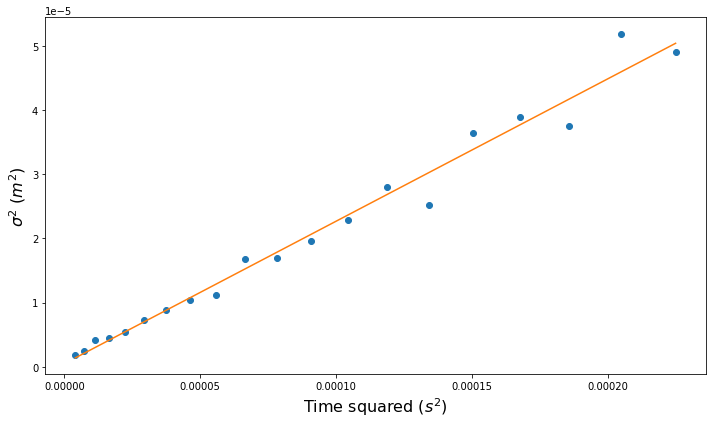

In [59]:
fig, ax = plt.subplots(figsize=(10.0,6.0), tight_layout=True)

ax.plot(t**2,sigma**2, marker="o", linestyle="")
ax.plot(t**2, linfunc(t**2, *popt))

ax.set_xlabel("Time squared ($s^2$)", fontsize=16)
ax.set_ylabel("$\sigma^2$ ($m^2$)", fontsize=16)

In [60]:
sigma_v_fit = np.sqrt(popt[0])
err_sigma_v = 100 * np.abs(sigma_v_fit - sigma_v)/sigma_v

T_fit = m*sigma_v_fit**2/k_B
err_T = 100 * np.abs(T-T_fit)/T

print(f"Relative error on sigma_v estimation: {err_sigma_v:.2f} %")
print(f"Relative error on temperature estimation: {err_T:.2f} %")

Relative error on sigma_v estimation: 3.36 %
Relative error on temperature estimation: 6.83 %


### Test with 3 data per time value

In [132]:
large_t = np.concatenate((t,t,t))
large_sigma = np.random.normal(1.0, 0.05, 3*N) * np.sqrt(sigma_0**2 + sigma_v**2 * large_t**2)

In [133]:
popt, pcov = opt.curve_fit(linfunc, large_t**2, large_sigma**2)

Text(0, 0.5, '$\\sigma^2$ ($m^2$)')

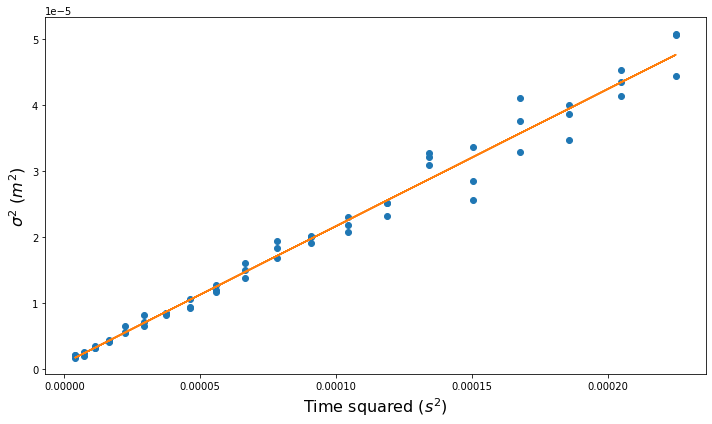

In [134]:
fig, ax = plt.subplots(figsize=(10.0,6.0), tight_layout=True)

ax.plot(large_t**2, large_sigma**2, marker="o", linestyle="")
ax.plot(large_t**2, linfunc(large_t**2, *popt))

ax.set_xlabel("Time squared ($s^2$)", fontsize=16)
ax.set_ylabel("$\sigma^2$ ($m^2$)", fontsize=16)

### BENCHMARK

#### Fitting sigma^2 = f(t^2) ; 1 data per time value

In [81]:
def temp_err(noise):
    data_sigma = [ np.random.normal(1.0, noise, N) * np.sqrt(sigma_0**2 + sigma_v**2 * t**2) for i in range(30000) ]

    err_fitted_T = []
    for sigma in data_sigma:
        param, _ = opt.curve_fit(linfunc, t**2, sigma**2)
        temp = (m/k_B) * param[0]
        temp = 100 * np.abs(T-temp)/T
        err_fitted_T.append(temp)
    
    return np.mean(err_fitted_T)


In [83]:
noise = np.linspace(0.01, 0.15, 10)
error = []
for val in noise:
    error.append(temp_err(val))

In [94]:
error_fit, _ = opt.curve_fit(linfunc, noise, error)

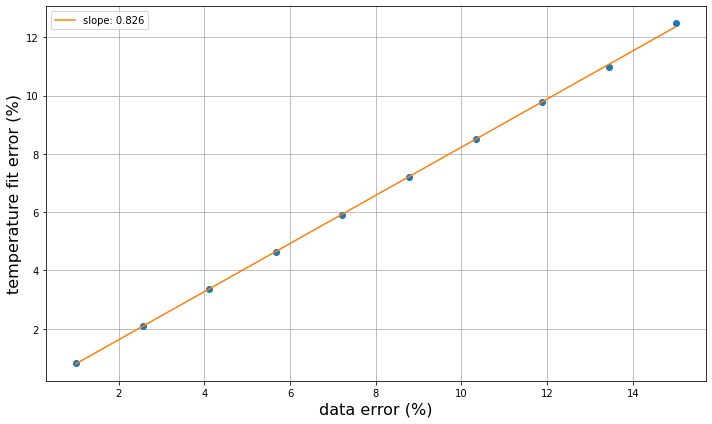

In [100]:
fig, ax = plt.subplots(figsize=(10.0,6.0), tight_layout=True)

ax.plot(100*noise, error, marker="o", linestyle="")
ax.plot(100*noise, linfunc(noise, *error_fit), label=f"slope: {error_fit[0]/100:.3f}")

ax.set_xlabel("data error (%)", fontsize=16)
ax.set_ylabel("temperature fit error (%)", fontsize=16)
plt.legend()
plt.grid()


### Test with 3 data per time value

In [136]:
def temp_err_large_data(noise):
    data_sigma = [ np.random.normal(1.0, noise, 3*N) * np.sqrt(sigma_0**2 + sigma_v**2 * large_t**2) for i in range(30000) ]

    err_fitted_T = []
    for sigma in data_sigma:
        param, _ = opt.curve_fit(linfunc, t**2, sigma**2)
        temp = (m/k_B) * param[0]
        temp = 100 * np.abs(T-temp)/T
        err_fitted_T.append(temp)
    
    return np.mean(err_fitted_T)

In [137]:
noise = np.linspace(0.01, 0.15, 10)
error = []
for val in noise:
    error.append(temp_err(val))

In [138]:
error_fit, _ = opt.curve_fit(linfunc, noise, error)

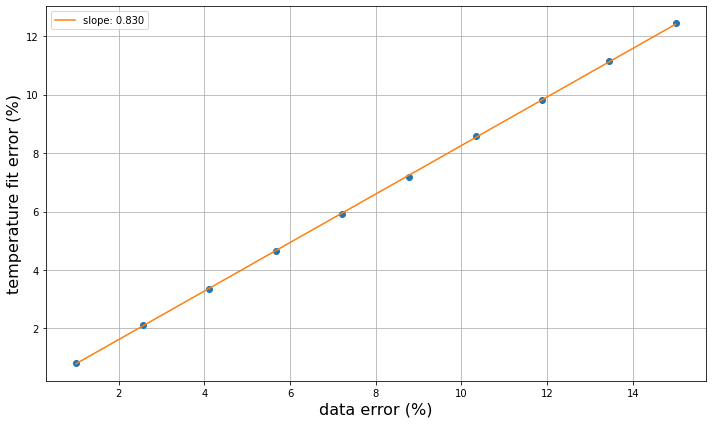

In [139]:
fig, ax = plt.subplots(figsize=(10.0,6.0), tight_layout=True)

ax.plot(100*noise, error, marker="o", linestyle="")
ax.plot(100*noise, linfunc(noise, *error_fit), label=f"slope: {error_fit[0]/100:.3f}")

ax.set_xlabel("data error (%)", fontsize=16)
ax.set_ylabel("temperature fit error (%)", fontsize=16)
plt.legend()
plt.grid()